In [1]:
## 01 데이터 불러오기, 라이브러리
import pandas as pd
import matplotlib.pyplot as plt

In [86]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [3]:
## 02 데이터 개수
print(train.shape, test.shape)

(10886, 12) (6493, 9)


In [10]:
## 03 데이터 확인하기
train.info
train.describe()
train.dtypes

print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB
None


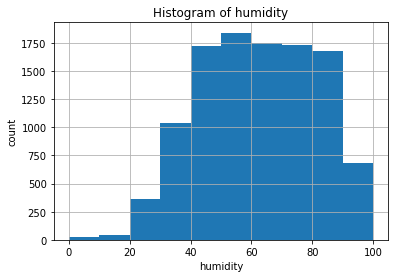

In [15]:
## 04 간단한 histogram 
plt.xlabel('humidity')
plt.ylabel('count')
plt.title('Histogram of humidity')
plt.grid(True)

plt.hist(train['humidity'])
plt.show()

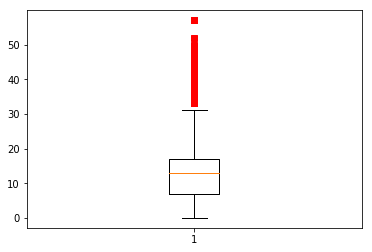

In [19]:
## 05 이상치가 있다면 이상치 처리
train.describe()
plt.figure()
plt.boxplot(train['windspeed'], 0, 'rs', vert = 1)
plt.show()

In [23]:
## 07 모델 만들기
#통계학에서는 변수라고 하지만 머신러닝에서는 feature라 한다.
#우리는 여기에서는 feature라 명명하겠다.
#(1) feature를 선택하고 훈련 데이터의 선택(입력데이터 X:종속변수)
#(2) 검증용 데이터 지정(입력데이터 X:종속변수)

feature_names = ['season', 'holiday','workingday', 'weather','temp','atemp','humidity','windspeed']

# train data 변수 지정
x_train = train[feature_names]
x_train.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,1,0,0,1,9.84,14.395,81,0.0
1,1,0,0,1,9.02,13.635,80,0.0
2,1,0,0,1,9.02,13.635,80,0.0


In [25]:
# test data 변수 지정
x_test = test[feature_names]
x_test.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,1,0,1,1,10.66,11.365,56,26.0027
1,1,0,1,1,10.66,13.635,56,0.0000
2,1,0,1,1,10.66,13.635,56,0.0000


In [27]:
# 데이터 확인. 변수 숫자가 같아야함.
print(x_train.shape, x_test.shape)

(10886, 8) (6493, 8)


In [28]:
# 데이터 준비 y(종속변수)
label_name = 'count'
y_train = train[label_name]

y_train.head(3)

0    16
1    40
2    32
Name: count, dtype: int64

In [29]:
## 08 모델 생성 및 평가
from sklearn.ensemble import RandomForestRegressor

# 샘플 패턴 지정 - 동일한 샘플 뽑음
seed = 45

# 
model = RandomForestRegressor(n_jobs=-1,
                             random_state=seed) #n_jobs=-1 프로세서 모두를 선택해서 사용
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=45, verbose=0, warm_start=False)

** Score ** = Root Mean Squared Logarithmic Error, RMSLE.

$$ \sqrt{\frac{1}{n} \sum_{i=1}^n (\log(p_i + 1) - \log(a_i+1))^2 } $$


In [30]:
## 검증용 데이터 이용하여 예측
model.fit(x_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=45, verbose=0, warm_start=False)

In [35]:
# 값 예측
prev = model.predict(x_test)
prev[0:5]

array([ 177.86,   72.6 ,   72.6 ,   99.7 ,   99.7 ])

In [41]:
# 예측된 값 제출
submission = pd.read_csv("sampleSubmission.csv")
submission.head()
submission["count"] = prev # count 커럼의 값을 prev으로 변경
submission.head(3)

submission.to_csv("res01.csv", index=False)

In [91]:
##### 02 #####

train2 = pd.read_csv("train.csv",parse_dates=["datetime"])
test2 = pd.read_csv("test.csv",parse_dates=["datetime"])
train2.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [90]:
# 파생변수 만들기
train2['year'] = train2['datetime'].dt.year
print(train2.columns)
print(train2.head(3))


Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year'],
      dtype='object')
             datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   

   humidity  windspeed  casual  registered  count  year  
0        81        0.0       3          13     16  2011  
1        80        0.0       8          32     40  2011  
2        80        0.0       5          27     32  2011  


In [94]:
train2['year'] = train2['datetime'].dt.year
train2['month'] = train2['datetime'].dt.month
train2['day'] = train2['datetime'].dt.day
train2['hour'] = train2['datetime'].dt.hour
train2['minute'] = train2['datetime'].dt.minute
train2['second'] = train2['datetime'].dt.second
train2['dayofweek'] = train2['datetime'].dt.dayofweek

0        2011
1        2011
2        2011
3        2011
4        2011
5        2011
6        2011
7        2011
8        2011
9        2011
10       2011
11       2011
12       2011
13       2011
14       2011
15       2011
16       2011
17       2011
18       2011
19       2011
20       2011
21       2011
22       2011
23       2011
24       2011
25       2011
26       2011
27       2011
28       2011
29       2011
         ... 
10856    2012
10857    2012
10858    2012
10859    2012
10860    2012
10861    2012
10862    2012
10863    2012
10864    2012
10865    2012
10866    2012
10867    2012
10868    2012
10869    2012
10870    2012
10871    2012
10872    2012
10873    2012
10874    2012
10875    2012
10876    2012
10877    2012
10878    2012
10879    2012
10880    2012
10881    2012
10882    2012
10883    2012
10884    2012
10885    2012
Name: year, Length: 10886, dtype: int64

In [79]:
test2['year'] = test2['datetime'].dt.year
test2['month'] = test2['datetime'].dt.month
test2['day'] = test2['datetime'].dt.day
test2['hour'] = test2['datetime'].dt.hour
test2['minute'] = test2['datetime'].dt.minute
test2['second'] = test2['datetime'].dt.second
test2['dayofweek'] = test2['datetime'].dt.dayofweek

In [82]:
feature_names2 = ['season', 'holiday', 'workingday', 'weather', 'temp',
               'atemp',  'humidity', 'windspeed', 
                'year', 'hour', 'dayofweek']

feature_names = ['season', 'holiday','workingday', 'weather','temp','atemp','humidity','windspeed']

In [83]:
X_train2 = train2[feature_names2]
X_train2.head(3)
X_test2 = test2[feature_names2]

In [96]:
## 데이터 준비 y(종속변수)
label_name2 = "count"
y_train2 = train2[label_name]

y_train2.head()

### 08. 모델 생성 및 평가

## 08. 모델 생성 및 평가
from sklearn.ensemble import RandomForestRegressor

##  샘플 패턴 지정 - 동일한 샘플을 뽑겠다.
seed = 45

# 중요 파라미터 - 
# n_estimators : 의사결정나무의 개수
# max_depth  : 트리의 깊이 
# max_features='auto'  : 트리를 만들기 위해 최대 feature 를 몇개로 선택

model2 = RandomForestRegressor(n_jobs=-1,
                             random_state=seed)
model2


model2.fit(X_train2, y_train2)

# 값을 예측
prev2 = model2.predict(X_test2)
prev2[0:5]

# 예측된 값을 제출한다.
sub = pd.read_csv("sampleSubmission.csv")
sub.head()
sub["count"] = prev  # count 컬럼의 값을 prev로 바꾼다.
sub.head(3)


,datetime,count
0,2011-01-20 00:00:00,177.86
1,2011-01-20 01:00:00,72.60
2,2011-01-20 02:00:00,72.60


In [101]:
print(train2.columns)

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'dayofweek'],
      dtype='object')
